In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from modules.LDS import Kalman_EM
from modules.WF_sim import *


# WF simulation

A is not provide! A_demo is used.


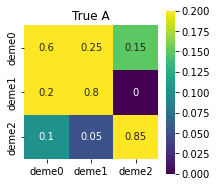

True Neff =  [2000, 2000, 2000]
True measurement noise overdispersion =  [1, 1, 1]


In [9]:
ND = 3 # the number of demes 
T=10 # the number of timepoints
Csn =[1]*ND # strength of measurement noise overdispersion
Npop = [2000]*ND # effective population size
totcounts=np.array([[2000,3000,1500]]*T).T # number of sequences sampled from each region
A,counts,B=WF_sim(Npop,totcounts, Csn, ND, T, A=None,Ntraj=20)

demes=['deme'+str(i) for i in range(ND)]

plt.figure(figsize=[3,3])
sns.heatmap(A,cmap='viridis',vmax=0.2,annot=True,xticklabels=demes, yticklabels=demes,square=True)
plt.title('True A')
plt.show()

print("True Neff = ", Npop)
print("True measurement noise overdispersion = ", Csn )

## HMM-EM
* INPUT
    * counts: spatio-temporal data of allele (or lineage) counts, with shape (#demes, #trajectories,#timepoints).
    * totcounts: spatio-temporal data of total number of sampled sequences, with shape (#demes, #timepoints).
* OUTPUT
    * lnLH_record: Record of log likelihood across EM cycles,
    * A_EM: Inferred A.
    * Ne_EM: Inferred effective population size.
    * A_LS: Least squares solution (noises ignored).
    * Csn_EM: Inferred measurment noise overdispersion.

terminate at step=9, DA=0.00025, ratioDNe=0.02219, ratioDCsn=0.0088


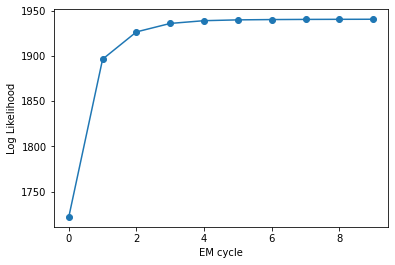

In [10]:
lnLH_record, A_EM, Ne_EM, A_LS,Csn_EM=Kalman_EM(counts=counts+1, 
                                             counts_deme=totcounts, 
                                             em_step_max=100,terminate_th=0.001, 
                                             frac=0.5,noisemode=2,Qprintstep=False)

plt.plot(lnLH_record,marker='o')
plt.xlabel('EM cycle')
plt.ylabel('Log Likelihood')
plt.show()

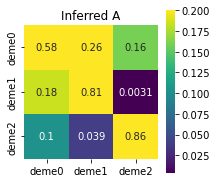

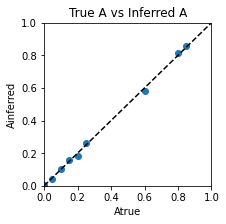

Inferred Neff =  [2055.77417769 1673.28263432 2144.02160653]
Inferred measurement noise overdispersion =  [1.0831536 1.        1.0205536]


In [11]:
plt.figure(figsize=[3,3])
sns.heatmap(A_EM,cmap='viridis',vmax=0.2,annot=True,xticklabels=demes, yticklabels=demes,square=True)
plt.title('Inferred A')
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(A.flatten(),A_EM.flatten())
plt.plot([0,1],'--',color='k')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Atrue')
plt.ylabel('Ainferred')
plt.title('True A vs Inferred A')
plt.show()

print("Inferred Neff = ", Ne_EM)
print("Inferred measurement noise overdispersion = ", Csn_EM)